In [1]:
import pandas as pd
import nba_api

In [2]:
from nba_api.stats.static import teams
from nba_api.stats.static import players

In [3]:
from nba_api.stats.endpoints import teamyearbyyearstats 
from nba_api.stats.endpoints import cumestatsplayergames
from nba_api.stats.endpoints import playergamelog

In [4]:
active_player_dict=players.get_active_players() 
#une liste de dictionnaires recensant les id, full_name, first_name,_ last_name de chaque joeur

In [31]:
#Un exemple avec LeBron James
gamelog_bron = playergamelog.PlayerGameLog(player_id='2544', season = '2019').get_data_frames()[0]
gamelog_bron.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [32]:
# On retient les colonnes qui nous interessent
df_lebron=gamelog_bron[['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN','PTS','REB', 'AST', 'STL', 'BLK', 'FGM', 'FGA','FG3M', 'FG3A','FTM', 'FTA', 'OREB', 'DREB','TOV', 'PF']]

In [33]:
#On implémente le score TTFL
df_lebron['TTFL']=df_lebron['PTS']+df_lebron['REB']+df_lebron['AST']+df_lebron['STL']+df_lebron['BLK']+df_lebron['FGM']+df_lebron['FG3M']+df_lebron['FTM']-df_lebron['TOV']-(df_lebron['FGA']-df_lebron['FGM'])-(df_lebron['FG3A']-df_lebron['FG3M'])-(df_lebron['FTA']-df_lebron['FTM'])

C:\Users\veve1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
# On rajoute une colonne adversaire, plus lisible que la colonne MATCHUP
df_lebron['ADV']=[df_lebron['MATCHUP'][i][-3:] for i in range(len(df_lebron['MATCHUP']))]

# On veut faire apparaitre le nom dans une colonne
df_lebron['NAME']=[player for player in active_player_dict if player['id'] == df_lebron['Player_ID'][0]][0]['full_name']

# On observe la base 
df_lebron.head()

C:\Users\veve1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\veve1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,REB,AST,...,FG3A,FTM,FTA,OREB,DREB,TOV,PF,TTFL,ADV,NAME
0,22019,2544,0021901310,"AUG 13, 2020",LAL vs. SAC,L,15,17,3,4,...,5,3,3,1,2,3,0,22,SAC,LeBron James
1,22019,2544,0021901296,"AUG 10, 2020",LAL vs. DEN,W,38,29,1,12,...,11,6,10,0,1,5,0,37,DEN,LeBron James
2,22019,2544,0021901282,"AUG 08, 2020",LAL @ IND,L,35,31,8,7,...,6,3,6,1,7,1,4,46,IND,LeBron James
3,22019,2544,0021901265,"AUG 05, 2020",LAL vs. OKC,L,30,19,11,4,...,5,5,8,1,10,0,1,27,OKC,LeBron James
4,22019,2544,0021901255,"AUG 03, 2020",LAL @ UTA,W,35,22,8,9,...,5,2,2,1,7,4,3,41,UTA,LeBron James


In [36]:
# C'est contre Atlanta et Chicago que LeBron ses meilleures MOYENNES TTFL
df_lebron.groupby('ADV')['TTFL'].mean().sort_values(ascending=False).head()

ADV
ATL    58.00
CHI    58.00
MIN    55.00
DAL    52.75
CLE    51.00
Name: TTFL, dtype: float64

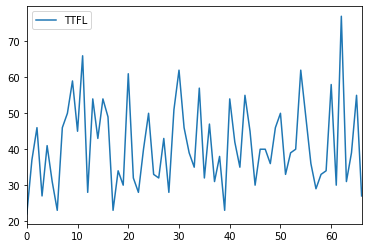

In [38]:
df_lebron[['GAME_DATE', 'TTFL']].plot()

In [40]:
#Un exemple avec James Harden
Harden_id=[player for player in active_player_dict if player['full_name'] == 'James Harden'][0]['id']

gamelog_harden = playergamelog.PlayerGameLog(player_id=Harden_id, season = '2019').get_data_frames()[0]
df_harden=gamelog_harden[['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN','PTS','REB', 'AST', 'STL', 'BLK', 'FGM', 'FGA','FG3M', 'FG3A','FTM', 'FTA', 'OREB', 'DREB','TOV', 'PF']]

df_harden['TTFL']=df_harden['PTS']+df_harden['REB']+df_harden['AST']+df_harden['STL']+df_harden['BLK']+df_harden['FGM']+df_harden['FG3M']+df_harden['FTM']-df_harden['TOV']-(df_harden['FGA']-df_harden['FGM'])-(df_harden['FG3A']-df_harden['FG3M'])-(df_harden['FTA']-df_harden['FTM'])

df_harden['ADV']=[df_harden['MATCHUP'][i][-3:] for i in range(len(df_harden['MATCHUP']))]

df_harden['NAME']=[player for player in active_player_dict if player['id'] == df_harden['Player_ID'][0]][0]['full_name']

df_harden.head()

C:\Users\veve1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\veve1\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\veve1\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,REB,AST,...,FG3A,FTM,FTA,OREB,DREB,TOV,PF,TTFL,ADV,NAME
0,22019,201935,0021901315,"AUG 14, 2020",HOU vs. PHI,L,26,27,3,10,...,9,5,5,0,3,7,1,42,PHI,James Harden
1,22019,201935,0021901304,"AUG 12, 2020",HOU vs. IND,L,35,45,17,9,...,14,12,14,1,16,6,2,83,IND,James Harden
2,22019,201935,0021901290,"AUG 09, 2020",HOU @ SAC,W,33,32,8,7,...,12,9,9,0,8,4,1,49,SAC,James Harden
3,22019,201935,0021901273,"AUG 06, 2020",HOU vs. LAL,W,36,39,8,12,...,10,12,12,1,7,10,2,68,LAL,James Harden
4,22019,201935,0021901261,"AUG 04, 2020",HOU @ POR,L,33,23,6,9,...,8,6,7,3,3,4,5,34,POR,James Harden


In [59]:
# On concatène les 2 bases
Fusion=pd.concat([df_lebron,df_harden]).sort_values('GAME_DATE') 

Fusion.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,REB,AST,...,FG3A,FTM,FTA,OREB,DREB,TOV,PF,TTFL,ADV,NAME
5,22019,2544,0021901243,"AUG 01, 2020",LAL @ TOR,L,35,20,10,5,...,5,4,7,1,9,4,1,31,TOR,LeBron James
5,22019,201935,0021901248,"AUG 02, 2020",HOU vs. MIL,W,34,24,7,7,...,12,11,13,1,6,3,5,40,MIL,James Harden
4,22019,2544,0021901255,"AUG 03, 2020",LAL @ UTA,W,35,22,8,9,...,5,2,2,1,7,4,3,41,UTA,LeBron James
4,22019,201935,0021901261,"AUG 04, 2020",HOU @ POR,L,33,23,6,9,...,8,6,7,3,3,4,5,34,POR,James Harden
3,22019,2544,0021901265,"AUG 05, 2020",LAL vs. OKC,L,30,19,11,4,...,5,5,8,1,10,0,1,27,OKC,LeBron James


In [5]:
# La généralisation avec toute la NBA
players_id = [active_player_dict[i]['id'] for i in range(len(active_player_dict))]
Stats=pd.DataFrame(columns=['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN','PTS','REB', 'AST', 'STL', 'BLK', 'FGM', 'FGA','FG3M', 'FG3A','FTM', 'FTA', 'OREB', 'DREB','TOV', 'PF', 'TTFL', 'ADV'])

for i in range(len(players_id)):
    gamelog = playergamelog.PlayerGameLog(player_id= players_id[i] , season = '2019').get_data_frames()[0]
    df_id=gamelog[['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN','PTS','REB', 'AST', 'STL', 'BLK', 'FGM', 'FGA','FG3M', 'FG3A','FTM', 'FTA', 'OREB', 'DREB','TOV', 'PF']]
    df_id['TTFL']=df_id['PTS']+df_id['REB']+df_id['AST']+df_id['STL']+df_id['BLK']+df_id['FGM']+df_id['FG3M']+df_id['FTM']-df_id['TOV']-(df_id['FGA']-df_id['FGM'])-(df_id['FG3A']-df_id['FG3M'])-(df_id['FTA']-df_id['FTM'])
    df_id['ADV']=[df_id['MATCHUP'][j][-3:] for j in range(len(df_id['MATCHUP']))]
    if not(df_id.empty):
        df_id['NAME']=[player for player in active_player_dict if player['id'] == df_id['Player_ID'][0]][0]['full_name']
    Stats=pd.concat([Stats,df_id])

Stats=Stats[['SEASON_ID', 'NAME','Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN','PTS','REB', 'AST', 'STL', 'BLK', 'FGM', 'FGA','FG3M', 'FG3A','FTM', 'FTA', 'OREB', 'DREB','TOV', 'PF', 'ADV','TTFL']]

C:\Users\veve1\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\veve1\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\veve1\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [14]:
Stats['TTFL']=Stats['TTFL'].apply(pd.to_numeric)

In [17]:
len(active_player_dict) , len(set(Stats['Player_ID']))

(519, 507)

In [13]:
Stats.to_csv('DATA_TTFL.csv', index=False)